
# Fetching Crypto Rates

Fetching historical daily rates for **AUDUSD** (Austarlian Dollar / US Dollar).

Using [AlphaVantage Service](https://alphavantage.co) and [alpha_vantage package](https://github.com/RomelTorres/alpha_vantage/).

## Prepare API Keys

Firstly, [get an API Key from AlphaVantage](https://www.alphavantage.co/support/#api-key). 
Secondly, [Set & Get API Keys from environment variable](https://stackoverflow.com/a/5971326/3381997). 


In [9]:
import os, sys

api_key = "6Z16V2GZLU7N0RKG"
try:  
   api_key = os.environ["ALPHAVANTAGE_API_KEY"]
   print("Found AlphaVantage API Key")
except KeyError: 
   print("Please set the environment variable ALPHAVANTAGE_API_KEY")
   sys.exit(1)

Please set the environment variable ALPHAVANTAGE_API_KEY


SystemExit: 1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)



## Getting Data via REST API

For more info, please visit [AlphaVantage Docs](https://www.alphavantage.co/documentation/).

### Getting Data


In [18]:

import pandas as pd
import requests, io

base_url = 'https://www.alphavantage.co'
api_function = 'DIGITAL_CURRENCY_DAILY'
from_symbol = 'BTC' # Crypto Symbol
to_symbol = 'USD' # Crypto Market
data_type = 'csv'

# Building api_url
api_url = '{}/query?function={}&symbol={}&market={}&apikey={}&datatype={}'.format(base_url, 
                                                                                  api_function, 
                                                                                  from_symbol, 
                                                                                  to_symbol, 
                                                                                  api_key, 
                                                                                  data_type)

# Getting Data
raw_data = requests.get(api_url)
crypto_csv = raw_data.content
crypto_df = pd.read_csv(io.StringIO(crypto_csv.decode('utf-8')))
crypto_df.head()

,timestamp,open (USD),high (USD),low (USD),close (USD),open (USD).1,high (USD).1,low (USD).1,close (USD).1,volume,market cap (USD)
0,2019-06-18,9344.010723,9362.460642,8987.511333,9090.359497,9344.010723,9362.460642,8987.511333,9090.359497,70999.706604,6.454129e+08
1,2019-06-17,8990.240869,9432.844381,8990.240869,9330.362934,8990.240869,9432.844381,8990.240869,9330.362934,85796.133843,8.005091e+08
2,2019-06-16,8856.450426,9363.418847,8821.426542,8984.978725,8856.450426,9363.418847,8821.426542,8984.978725,109569.663011,9.844811e+08
3,2019-06-15,8696.695028,8876.709040,8634.875764,8851.647936,8696.695028,8876.709040,8634.875764,8851.647936,53240.820937,4.712690e+08
4,2019-06-14,8239.682642,8718.514597,8198.436504,8688.281613,8239.682642,8718.514597,8198.436504,8688.281613,68128.611489,5.919206e+08



### Processing Data


In [19]:

crypto_df = crypto_df.rename(index=str, 
                             columns={"open (USD)": "open", 
                                      "high (USD)": "high",
                                      "low (USD)": "low",
                                      "close (USD)": "close",})
crypto_df['pre_close'] = crypto_df.close.shift(-1)
crypto_df['p_change'] = (crypto_df.close / crypto_df.pre_close - 1) # Raw percentage change
crypto_df['pip_change'] = (crypto_df.close / crypto_df.pre_close - 1) * 10000 # Pip Change (Percentage of a Point)



### Sorting Data


In [20]:

# Sorting Data by dates
crypto_df = crypto_df.sort_values('timestamp', ascending=True) 
crypto_df = crypto_df.iloc[1:]

# Save & Print
crypto_df.to_csv('../gen/{}{}_Daily_df.csv'.format(from_symbol, to_symbol))
crypto_df.head()


,timestamp,open,high,low,close,open (USD).1,high (USD).1,low (USD).1,close (USD).1,volume,market cap (USD),pre_close,p_change,pip_change
1903,2014-04-02,479.679615,494.111337,430.725909,438.377824,479.679615,494.111337,430.725909,438.377824,96314.587552,4.222218e+07,479.023434,-0.084851,-848.509844
1902,2014-04-03,437.322089,452.441405,414.811104,446.819755,437.322089,452.441405,414.811104,446.819755,74292.749549,3.319547e+07,438.377824,0.019257,192.572043
1901,2014-04-04,448.597144,457.327172,429.184117,451.645992,448.597144,457.327172,429.184117,451.645992,39267.667348,1.773508e+07,446.819755,0.010801,108.013068
1900,2014-04-05,450.027798,466.385470,445.107783,464.379322,450.027798,466.385470,445.107783,464.379322,21574.144537,1.001859e+07,451.645992,0.028193,281.931649
1899,2014-04-06,465.888799,472.365986,450.597413,462.215799,465.888799,472.365986,450.597413,462.215799,16624.902000,7.684292e+06,464.379322,-0.004659,-46.589570



## Plotting Data

Plotting close data.


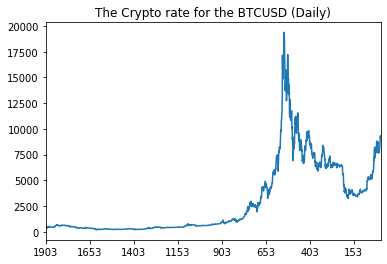

In [21]:

import matplotlib.pyplot as plt

crypto_df['close'].plot()
plt.title('The Crypto rate for the {}{} (Daily)'.format(from_symbol, to_symbol))
plt.show()


Daily pip Change for BTCUSD since 2001-05-11


count    1904.000000
mean        0.002289
std         0.038503
min        -0.207227
25%        -0.011653
50%         0.001770
75%         0.017485
max         0.248255
Name: p_change, dtype: float64

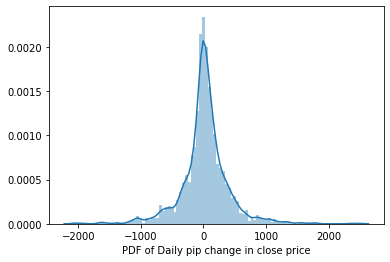

In [22]:
import seaborn as sns

sns.distplot(crypto_df.pip_change,
             axlabel="PDF of Daily pip change in close price",
             bins=100)
print("Daily pip Change for {}{} since 2001-05-11".format(from_symbol, to_symbol))
crypto_df.p_change.describe()